# Multinomial Naive Bayes Training

## Python Imports

In [1]:
import pickle

import numpy as np
from ML.Moderation.notebooks.utilities import data, ml_stats, sampling
from ML.Moderation.notebooks.utilities import train_test_split as tts
from ML.Moderation.notebooks.utilities import vectorize
from sklearn.feature_extraction.text import (
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)
from sklearn.naive_bayes import MultinomialNB

## Load data

In [2]:
df = data.neutral()

In [3]:
df_sampled = sampling.undersample(df)

## Training Function

In [4]:
def multi_nb(X_train, y_train, X_test, name, C=1.0, solver="saga", max_iter=100):
    clf = MultinomialNB()
    clf.fit(X_train, y_train.argmax(axis=1))
    pickle.dump(
        clf, open(f"../../models/neutral_models/{name}.pkl", "wb",),
    )
    return clf.predict(X_test), clf

## TF-IDF Vectorizer

### Vectorization

In [5]:
tfidf_vec, vocab = vectorize.tfidf(
    df_sampled["text"], "multi_nb", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  20.39
Length of vocabulary: 2992


### Train-Test Split

In [6]:
y = tts.encode_outputs(df_sampled["class"])

In [7]:
X_train, X_test, y_train, y_test = tts.split(tfidf_vec, y)

### Training

In [8]:
y_pred, model = multi_nb(
    X_train, y_train, X_test, "multi_nb_tfidf", C=5.0, solver="saga"
)

### Metrics

In [9]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.880274558343648
Class 0 Accuracy: 0.8650273224043716


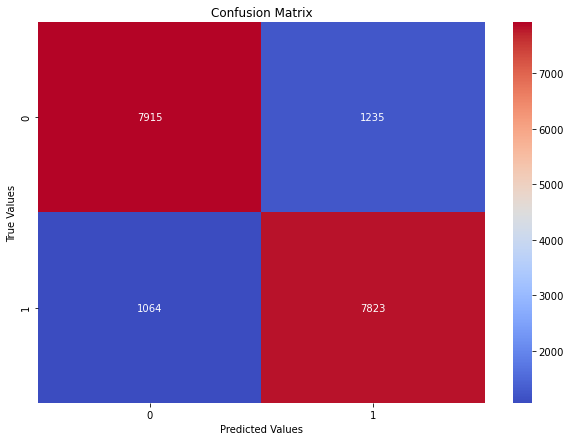

In [10]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [11]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

     Class 0       0.88      0.87      0.87      9150
     Class 1       0.86      0.88      0.87      8887

    accuracy                           0.87     18037
   macro avg       0.87      0.87      0.87     18037
weighted avg       0.87      0.87      0.87     18037



### Personal Test

In [4]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/multi_nb_tfidf_features.pkl", "rb")
)
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = loaded_vec.fit_transform(
    np.array(
        [
            "what are you a homo",
            "I love you",
            "I go to the mall",
            "fuck your mom bitch",
            "hello",
            "I have food",
            "you are gay as fuck",
            "niggers",
            "blessjesus",
        ]
    )
)
preds = model.predict(test_tfidf.toarray())
print(preds)

[1 1 1 1 0 1 1 1 1]


## Count Vectorizer

### Vectorization

In [13]:
count_vec, vocab = vectorize.count(
    df_sampled["text"], "multi_nb", max_df=0.90, min_df=100, vocab=True
)

Time to vectorize:  19.28
Length of vocabulary: 2992


### Train-Test Split

In [14]:
y = tts.encode_outputs(df_sampled["class"])

In [15]:
X_train, X_test, y_train, y_test = tts.split(count_vec, y)

### Training

In [16]:
y_pred, model = multi_nb(X_train, y_train, X_test, "multi_nb_count", max_iter=500)

### Metrics

In [18]:
ml_stats.class_accuracies(y_test, y_pred)

Class 1 Accuracy: 0.9277596489253966
Class 0 Accuracy: 0.8097267759562842


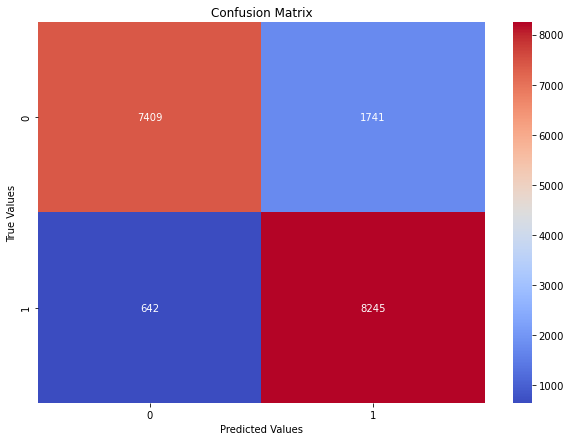

In [19]:
ml_stats.confusion_matrix_plot(y_test, y_pred, 2)

In [20]:
ml_stats.stats(y_test, y_pred, 2)


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87

Classification Report

              precision    recall  f1-score   support

     Class 0       0.92      0.81      0.86      9150
     Class 1       0.83      0.93      0.87      8887

    accuracy                           0.87     18037
   macro avg       0.87      0.87      0.87     18037
weighted avg       0.87      0.87      0.87     18037



### Personal Test

In [21]:
vocab_tfidf = pickle.load(
    open("../../models/neutral_models/vectorizers/multi_nb_count_features.pkl", "rb")
)
loaded_vec = CountVectorizer(decode_error="replace", vocabulary=vocab_tfidf)
test_tfidf = loaded_vec.fit_transform(
    np.array(
        [
            "what are you a homo",
            "I love you",
            "I go to the mall",
            "fuck your mom bitch",
            "hello",
            "I have food",
            "you are gay as fuck",
            "niggers",
            "blessjesus",
        ]
    )
)

preds = model.predict(test_tfidf.toarray())
# print(preds.argmax(axis=1))
print(preds)

[1 1 1 1 0 1 1 1 1]
